## Blackbody Lab | Christian H. Nunez & Guillermo ___ 

Measuring the filament surface area:

In [48]:
from __future__ import print_function, division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

Magnified length: 5.2cm +/- 0.05 cm
Magnified diameter: 1.5cm +/- 0.05 cm
d0 = (142.5 +/- 0.2 cm) - (137.65 +/- 0.05 cm)
d1 = (137.65 +/- 0.05 cm) - (60.25 +/- 0.05 cm)

Procedure:
(1) Use simplified intensity equation, inputting P = sigma A T^4 solved for T.
(2) Plot lnI vs. 1/T for linear curve
(3) Vary P, see whether Iv varies as expected
(4) Note, we are keeping frequency constant because of the filter

In [68]:
# Remember, pass in MAGNIFIED w, diam.
def getSurfaceArea(w, diam, d0, d1):
    M = d1/d0
    w = w/M
    diam = diam/M
    return np.pi * w * diam;

# Define constants:
N = 1.38*10**(-23)
h = 6.626*10**(-34)
lambda_filter = 546.1 * 10**(-9) # m
v = 299792458 / lambda_filter # Hz
kb = 1.38064852 * 10**(-23) # m^2 * kg * s^-2 K^-1
sigma = 5.67 * 10**(-8) # W * * m * K^-4
A = getSurfaceArea(.052, .015, (1.425 - 1.3765), (1.3765 - .6025))

def intensity(T):
    return N * v**3 * np.exp(((-h*v)/(kb*T)))

def temperature(power):
    return (power/(sigma * A))**(1/4)

In [69]:
# Storing data with named columns 
d = {'Power' : [(2.4 * .7), (3.2 * .81), (3.9 * .9), (4.9), (1.11 * 5.9), (1.2 * 6.8), (1.3 * 7.9), (1.4 * 9.2),
               (1.5 * 10.5), (1.6 * 11.8)], 
     'Intensity' : [(1.26 * 10**(-9)), (7.7 * 10**(-9)), (27.6 * 10**(-9)), (86.2 * 10**(-9)), (.212 * 10**(-6)), 
                    (.414 * 10**(-6)), (.784 * 10**(-6)), (1.371 * 10**(-6)), (2.21 * 10**(-6)), (3.33 * 10**(-6))],
    'Temperature' : temperature(df.Power),
    'lnIntensity' : np.log(df.Intensity)}
df = pd.DataFrame(d)
df

,Intensity,Power,Temperature,lnIntensity
0,1.260000e-09,1.680,1324.707661,-20.492154
1,7.700000e-09,2.592,1476.391298,-18.682046
2,2.760000e-08,3.510,1592.646922,-17.405450
3,8.620000e-08,4.900,1731.178092,-16.266596
4,2.120000e-07,6.549,1861.386137,-15.366680
5,4.140000e-07,8.160,1966.596524,-14.697400
6,7.840000e-07,10.270,2082.981143,-14.058857
7,1.371000e-06,12.880,2204.305038,-13.499970
8,2.210000e-06,15.750,2317.996986,-13.022518
9,3.330000e-06,18.880,2425.455019,-12.612538


Things to remember:
(1) Zeroing of the ammeter
(2) We are collecting the same patch of intensity on the intensity sphere for each measurement

[-2.30081113e+04 -3.04591215e+00]


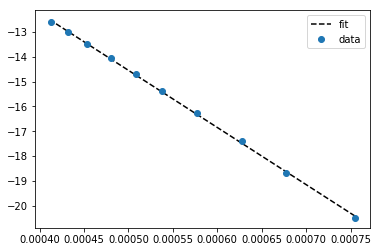

[-2.30081113e+04 -3.04591215e+00]


In [70]:
# Curve fitting:
def linear(x, m, b):
    return m*x + b

# Define x,y
x = 1/df.Temperature
y = df.lnIntensity

# Curve fit
params, cov = curve_fit(linear, x, y)
print(params)


# Make plot
plt.plot(x, linear(x, *params), "k--", label="fit")
plt.plot(1/df.Temperature, df.lnIntensity, "o", label="data")
plt.legend()
plt.show()
print(params)

In [71]:
def getPlancksConstant(slope):
    print("The calculated h: ", (-slope * kb)/v)

getPlancksConstant(params[0])

The calculated h:  5.786494905839587e-34
